A1.5 Solución de problemas

Jesus Esteban Bustamante Apodaca

1. Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola el tipo de dato de cada variable del data frame.

In [13]:
import pandas as pd
import numpy as np
ds = pd.read_csv("A1.5 Calificaciones.csv")
print(ds.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple. Presta especial atención a variables que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los números representan una clase). Imprime las primeras 5 observaciones de la base de datos modificada, demostrando que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas.

In [14]:
ds["Escuela"] = ds["Escuela"].map({"GP": 0, "MS": 1})
ds["Sexo"] = ds["Sexo"].map({"F": 0, "H": 1})
ds["Internet"] = ds["Internet"].map({"yes": 1, "no": 0})
print(ds.head(5))

   Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  \
0        0   0.0    18               2           0         0       6   5   6   
1        0   0.0    17               2           0         1       4   5   5   
2        0   0.0    15               2           3         1      10   7   8   
3        0   0.0    15               3           0         1       2  15  14   
4        0   0.0    16               2           0         0       4   6  10   

   G3  
0   6  
1   6  
2  10  
3  15  
4  10  


3. Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3.
Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las
características de dichas observaciones, agrega una línea de texto que describa qué
planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de ser
necesario.

In [15]:
Q1 = ds["Faltas"].quantile(0.25)
Q3 = ds["Faltas"].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 3 * IQR
df = ds[ds["Faltas"] <= limite_superior]
outliers = ds[ds["Faltas"] > limite_superior]
print(outliers)

     Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  \
74         0   0.0    16               2           0         1      54  11   
183        0   0.0    17               2           0         1      56   9   
276        0   0.0    18               2           0         1      75  10   
307        0   NaN    19               1           1         1      38   8   
315        0   0.0    19               3           1         1      40  13   

     G2  G3  
74   12  11  
183   9   8  
276   9   9  
307   9   8  
315  11  11  


4. Genera una matriz de correlaciones para encontrar potenciales problemas de
colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados.
Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento
en una línea de texto. Realiza la acción descrita en caso de ser necesario

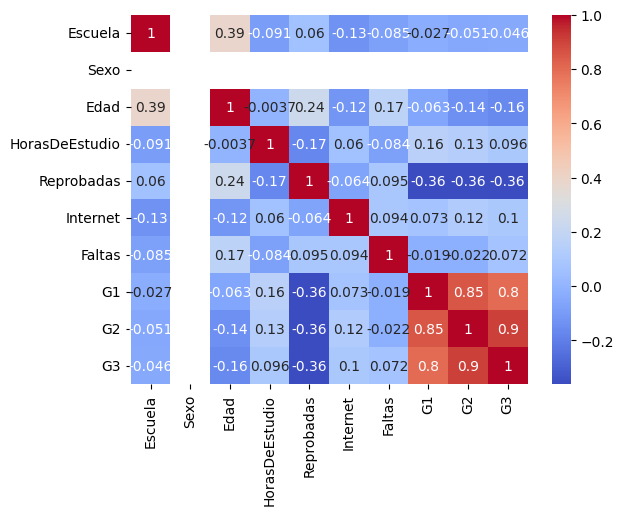

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlacion = df.corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()
df = df.drop(['G2'], axis=1)

5. Incluye términos de interacción para al menos dos pares de variables, las que te llame
más la atención analizar con esta metodología. Trata de evitar incluir interacciones para
todos los pares de variables posibles. Imprime en consola las primeras 5 observaciones
de la base de datos con los nuevos términos

In [17]:
df['Interaccion_1'] = df['Edad'] * df['HorasDeEstudio']
df['Interaccion_2'] = df['Reprobadas'] * df['Faltas']
print(df.head())

   Escuela  Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G3  \
0        0   0.0    18               2           0         0       6   5   6   
1        0   0.0    17               2           0         1       4   5   6   
2        0   0.0    15               2           3         1      10   7  10   
3        0   0.0    15               3           0         1       2  15  15   
4        0   0.0    16               2           0         0       4   6  10   

   Interaccion_1  Interaccion_2  
0             36              0  
1             34              0  
2             30             30  
3             45              0  
4             32              0  


6. Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que
corresponda al 80% de los datos totales e imprime en consola un resumen de los
resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final
del 20% de las observaciones que no se usaron para entrenar. Genera una gráfica de
dispersión de las calificaciones finales reales contra las calificaciones finales estimadas
por el modelo en los datos de prueba. Agrega una línea de texto donde des una
conclusión sobre los resultados del modelo, con base en la información que se muestra
en la gráfica.

Coeficientes: [ 5.90203006e-01  4.99600361e-16 -2.76485343e-01  9.07301737e-01
 -1.23607894e+00  1.92503794e-01  3.97479363e-02  1.07808272e+00
 -7.48342994e-02  1.23727737e-01]
Intercepto: 3.630815934692042


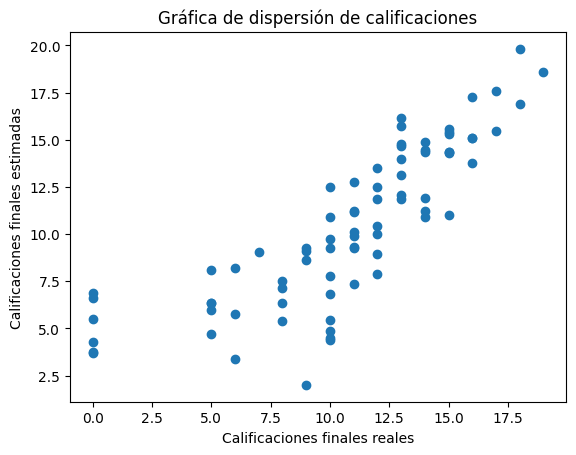

Error cuadrático medio: 6.802352176601302


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df.fillna(df.mean(), inplace=True) #Rellena los valores faltantes con la media

X = df.drop('G3', axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

y_pred = modelo.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Calificaciones finales reales")
plt.ylabel("Calificaciones finales estimadas")
plt.title("Gráfica de dispersión de calificaciones")
plt.show()
print("R cuadrada en el conjunto de prueba:", mean_squared_error(y_test, y_pred))